# Question

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger and what is the customer satisfaction?

# Content
Gender: Gender of the passengers (Female, Male).
Customer Type: The customer type (Loyal customer, disloyal customer).
Age: The actual age of the passengers.
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel).
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus).
Flight distance: The flight distance of this journey.
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5).
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient.
Ease of Online booking: Satisfaction level of online booking.
Gate location: Satisfaction level of Gate location.
Food and drink: Satisfaction level of Food and drink.
Online boarding: Satisfaction level of online boarding.
Seat comfort: Satisfaction level of Seat comfort.
Inflight entertainment: Satisfaction level of inflight entertainment.
On-board service: Satisfaction level of On-board service.
Leg room service: Satisfaction level of Leg room service.
Baggage handling: Satisfaction level of baggage handling.
Check-in service: Satisfaction level of Check-in service.
Inflight service: Satisfaction level of inflight service.
Cleanliness: Satisfaction level of Cleanliness.
Departure Delay in Minutes: Minutes delayed when departure.
Arrival Delay in Minutes: Minutes delayed when Arrival.
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction).  -- Target

# Approach

We will be performing a binary classification, where we'll create a number of models to predict the final customer satisfaction to the best possible accuracy.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, r2_score, accuracy_score, plot_confusion_matrix, classification_report

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# Reading and analyzing the data

In [3]:
train_dataset = pd.read_csv('archive/train.csv')
test_dataset = pd.read_csv('archive/test.csv')

train = train_dataset.copy()
test = test_dataset.copy()

In [4]:
print(f'Training Data Shape: {train.shape}')
print(f'Testing Data Shape: {test.shape}')
print('Training head')
train.head(5)

Training Data Shape: (103904, 25)
Testing Data Shape: (25976, 25)
Training head


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Here we can see the columns 'Unnamed: 0' and 'id' are not necessary for our purpose. Also columns like 'Gender', 'Customer Type', 'Type of Travel', 'Class', and target column 'satisfaction' are categorical in nature, which may prove to be a problem for a few models that we'll use further down the line, therefore we'll be encoding all these input features using label encoder.

# Processing Data

We'll check what are the unique variables just to be sure.

In [6]:
print(train['Gender'].unique())
print(train['Customer Type'].unique())
print(train['Type of Travel'].unique())
print(train['Class'].unique())
print(train['satisfaction'].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['neutral or dissatisfied' 'satisfied']


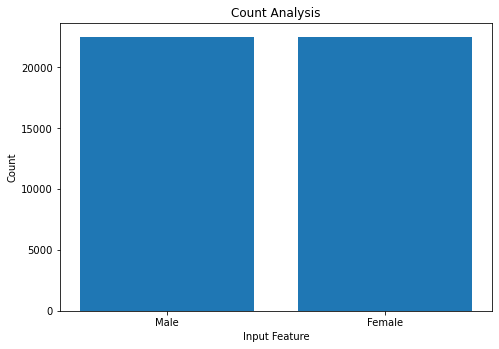

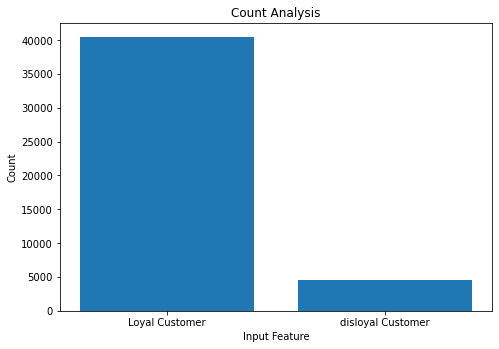

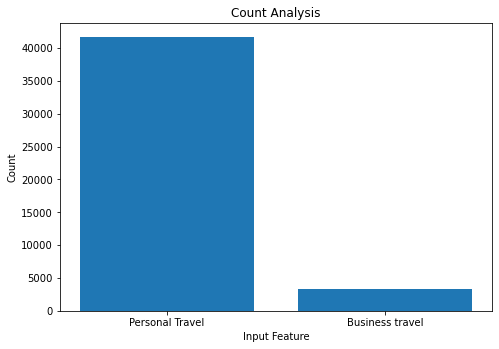

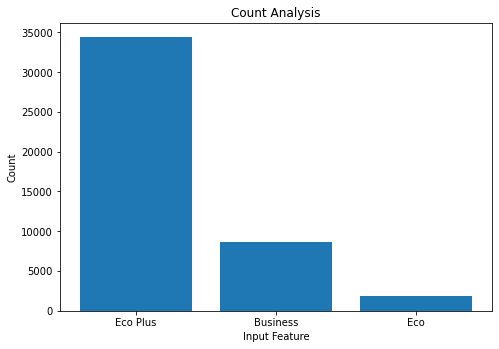

In [8]:
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(train[column].unique(), train[train['satisfaction']=='satisfied'].groupby(column).count()['satisfaction'].values)
    ax.set_xlabel('Input Feature')
    ax.set_ylabel('Count')
    ax.set_title('Count Analysis')

Defining the Label Encoder

In [9]:
label_encoder = LabelEncoder()

We'll be doing the same thing with both our training and testing datasets

In [10]:
train = train.drop(['Unnamed: 0', 'id'], axis = 1)
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Customer Type'] = label_encoder.fit_transform(train['Customer Type'])
train['Type of Travel'] = label_encoder.fit_transform(train['Type of Travel'])
train['Class'] = label_encoder.fit_transform(train['Class'])
train['satisfaction'] = label_encoder.fit_transform(train['satisfaction'])

In [11]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [12]:
test = test.drop(['Unnamed: 0', 'id'], axis = 1)
test['Gender'] = label_encoder.fit_transform(test['Gender'])
test['Customer Type'] = label_encoder.fit_transform(test['Customer Type'])
test['Type of Travel'] = label_encoder.fit_transform(test['Type of Travel'])
test['Class'] = label_encoder.fit_transform(test['Class'])
test['satisfaction'] = label_encoder.fit_transform(test['satisfaction'])

In [13]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


# Checking null values

In [14]:
print(train.isnull().sum()[train.isnull().sum() != 0 ])
print(test.isnull().sum()[test.isnull().sum() != 0 ])

Arrival Delay in Minutes    310
dtype: int64
Arrival Delay in Minutes    83
dtype: int64


We can see the only column with null values is 'Arrival Delay in Minutes'. Now, we can check distribution to decide strategy to fill null values.

Text(0.5, 1.0, 'Heatmap of Correlation')

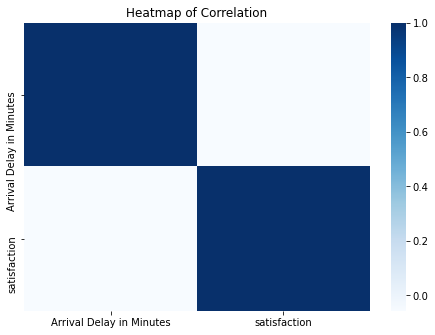

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.heatmap(train[['Arrival Delay in Minutes','satisfaction']].corr(), cmap='Blues')
ax.set_title('Heatmap of Correlation')

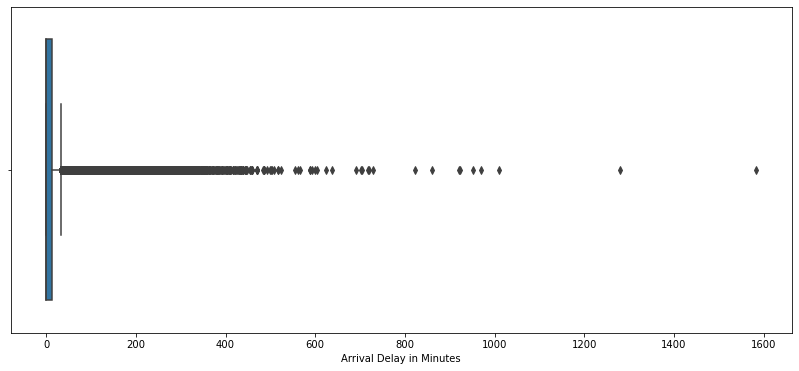

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(train['Arrival Delay in Minutes'])

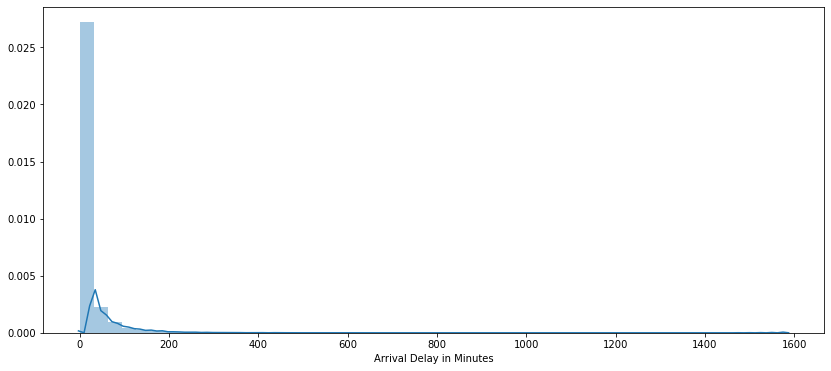

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
sns.distplot(train['Arrival Delay in Minutes'])

From both the above plots, we can see that the data here is right-skewed, numerous outliers towards the right. So in this case, we'll be using 'median' to impute our data.

In [18]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
train['Arrival Delay in Minutes'] = imputer.fit_transform(train['Arrival Delay in Minutes'].values.reshape(-1,1))[:,0]
test['Arrival Delay in Minutes'] = imputer.fit_transform(test['Arrival Delay in Minutes'].values.reshape(-1,1))[:,0]
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [19]:
print(train.isnull().sum()[train.isnull().sum() != 0 ])
print(test.isnull().sum()[test.isnull().sum() != 0 ])

Series([], dtype: int64)
Series([], dtype: int64)


Now that we have eliminated the null values, and preprocessed the data, we can go ahead with normalization and hence model creation

In [20]:
train.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


To check if we can drop any columns or not, we'll check the correlation heatmap

Text(0.5, 1.0, 'Heatmap of Train Dataset Correlation')

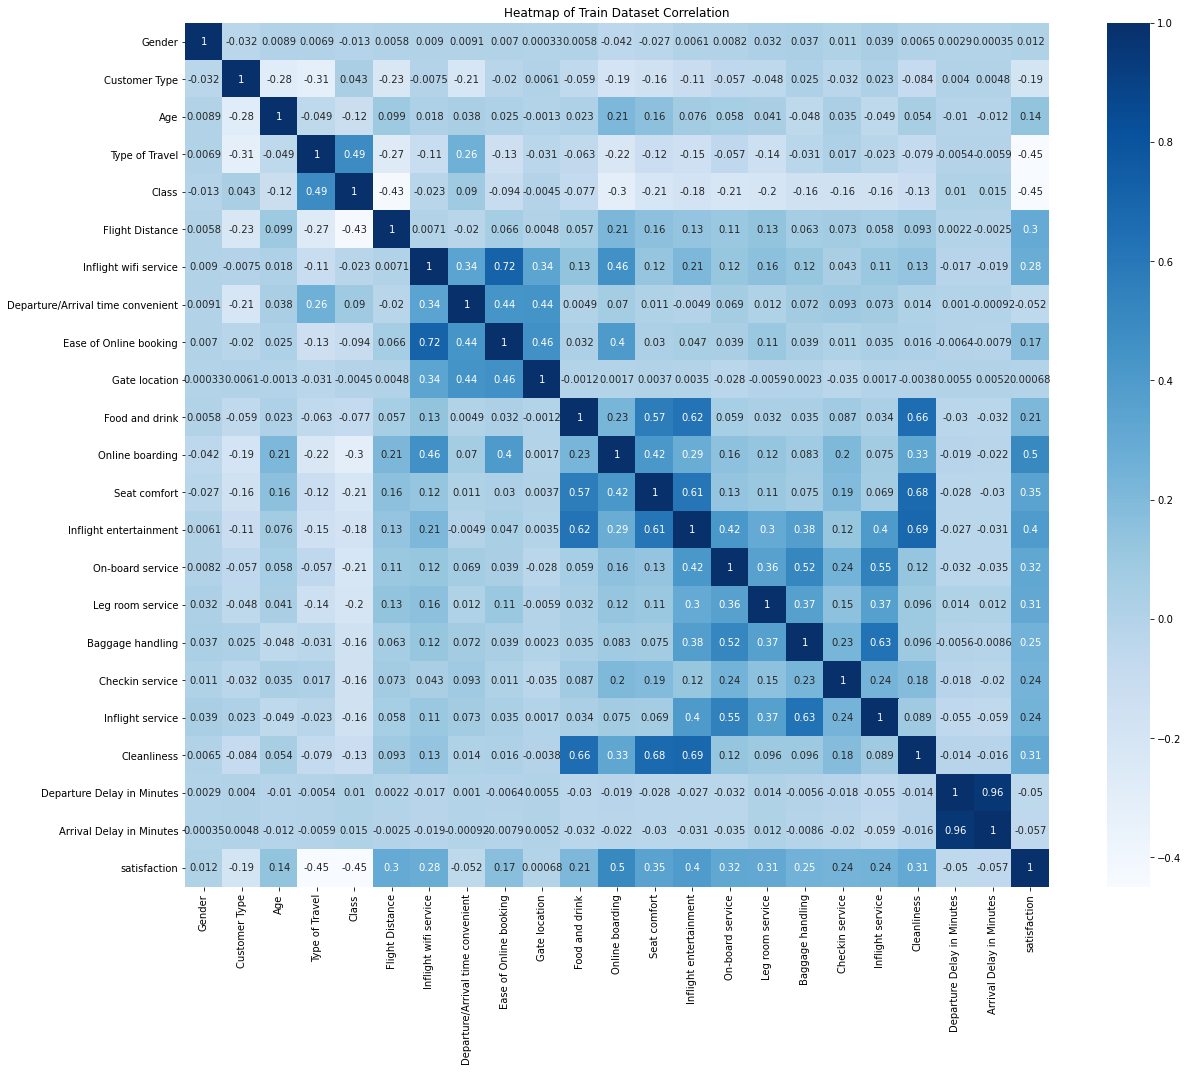

In [21]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(train.corr(), cmap='Blues', annot = True, square=True)
ax.set_title('Heatmap of Train Dataset Correlation')

From above correlation heatmap, we can see that the worst input features for 'satisfaction' are 
# 'Gate location', 
'Gender', and 'Departure/Arrival Time Convenient'

the best with (0.5, 0.45, 0,45 respectively) are
# 'Online Booking',
'Class', and 'Type of Travel'

So we can safely eliminate the categorical features 'Gate location',  'Gender'

In [22]:
#Features
train_features = train[[column for column in train.columns if column not in ['Gate location', 'Gender']]]
test_features = test[[column for column in train.columns if column not in ['Gate location', 'Gender']]]
#Labels
train_labels = train_features.pop('satisfaction')
test_labels = test_features.pop('satisfaction')

We're going to Normalize the continuous data, to 1NF, i.e mean = 0 and standard deviation = 1

In [23]:
scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

# Algorithms for classification

In [24]:
def run_model(model, train_features, train_labels, test_features, test_labels, verbose = False):
    if verbose:
        model.fit(train_features, train_labels, verbose=0)
    else:
        model.fit(train_features, train_labels)
        
    prediction = model.predict(test_features)
    roc_auc = roc_auc_score(test_labels, prediction)
    r2score = r2_score(test_labels, prediction)
    accuracy = accuracy_score(test_labels, prediction)
    print("ROC_AUC = {}".format(roc_auc))
    print("r2score = {}".format(r2score))
    print("accuracy = {}".format(accuracy))
    print(classification_report(test_labels, prediction, digits=5))
    plot_confusion_matrix(model,test_features, test_labels, cmap='Blues', normalize = 'all')
    
    return model, accuracy, list(prediction)

# Random Forest Classification implementation

ROC_AUC = 0.9608835501610796
r2score = 0.8502490123132702
accuracy = 0.96311980289498
              precision    recall  f1-score   support

           0    0.95611   0.97921   0.96752     14573
           1    0.97258   0.94256   0.95733     11403

    accuracy                        0.96312     25976
   macro avg    0.96435   0.96088   0.96243     25976
weighted avg    0.96334   0.96312   0.96305     25976



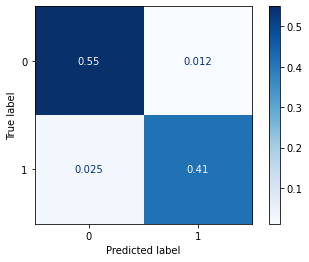

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf, accuracy_rf, prediction_rf = run_model(model_rf, train_features, train_labels, test_features, test_labels)

Random Forest Classification gives a relatively good accuracy of 96.25%

# XGBoost

[17:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC_AUC = 0.9606949127207777
r2score = 0.8489984821446963
accuracy = 0.9628118263012011
              precision    recall  f1-score   support

           0    0.95664   0.97804   0.96722     14573
           1    0.97111   0.94335   0.95703     11403

    accuracy                        0.96281     25976
   macro avg    0.96388   0.96069   0.96213     25976
weighted avg    0.96299   0.96281   0.96275     25976



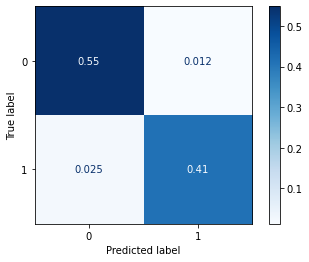

In [26]:
#!pip install xgboost
import xgboost as xgb

model_xgb = xgb.XGBClassifier()
model_xgb, accuracy_xgb, prediction_xgb = run_model(model_xgb, train_features, train_labels, test_features, test_labels)

XGBoost gives a relatively good accuracy of 96.28%.

# Deep Neural Net Model

In [27]:
from tensorflow import keras

In [28]:
ann_model = keras.Sequential(
    [keras.layers.Dense(32, activation='relu', input_shape=(train_features.shape[-1],)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(256, activation='relu'),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(1, activation='sigmoid'),
    ]
)

ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 38,177
Trainable params: 38,177
Non-trainable params: 0
____________________________________________________

In [29]:
ann_model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [30]:
ann_model_history = ann_model.fit(
    train_features,
    train_labels,
    batch_size=1024,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 3s 32ms/step - loss: 0.3137 - accuracy: 0.8639 - val_loss: 0.1459 - val_accuracy: 0.9388
Epoch 2/100
82/82 [==============================] - 1s 15ms/step - loss: 0.1426 - accuracy: 0.9408 - val_loss: 0.1206 - val_accuracy: 0.9499
Epoch 3/100
82/82 [==============================] - 1s 14ms/step - loss: 0.1316 - accuracy: 0.9444 - val_loss: 0.1083 - val_accuracy: 0.9550
Epoch 4/100
82/82 [==============================] - 1s 13ms/step - loss: 0.1169 - accuracy: 0.9509 - val_loss: 0.1077 - val_accuracy: 0.9562
Epoch 5/100
82/82 [==============================] - 1s 14ms/step - loss: 0.1135 - accuracy: 0.9519 - val_loss: 0.1014 - val_accuracy: 0.9567
Epoch 6/100
82/82 [==============================] - 1s 13ms/step - loss: 0.1068 - accuracy: 0.9549 - val_loss: 0.1007 - val_accuracy: 0.9586
Epoch 7/100
82/82 [==============================] - 1s 13ms/step - loss: 0.1130 - accuracy: 0.9527 - val_loss: 0.1011 - val_accuracy: 0.9568
Epoch 

82/82 [==============================] - 1s 12ms/step - loss: 0.0834 - accuracy: 0.9638 - val_loss: 0.0908 - val_accuracy: 0.9622
Epoch 59/100
82/82 [==============================] - 1s 13ms/step - loss: 0.0818 - accuracy: 0.9647 - val_loss: 0.0896 - val_accuracy: 0.9616
Epoch 60/100
82/82 [==============================] - 1s 14ms/step - loss: 0.0849 - accuracy: 0.9631 - val_loss: 0.0896 - val_accuracy: 0.9628
Epoch 61/100
82/82 [==============================] - 1s 14ms/step - loss: 0.0920 - accuracy: 0.9608 - val_loss: 0.0896 - val_accuracy: 0.9615
Epoch 62/100
82/82 [==============================] - 1s 13ms/step - loss: 0.0891 - accuracy: 0.9612 - val_loss: 0.0883 - val_accuracy: 0.9634
Epoch 63/100
82/82 [==============================] - 1s 14ms/step - loss: 0.0864 - accuracy: 0.9628 - val_loss: 0.0896 - val_accuracy: 0.9603
Epoch 64/100
82/82 [==============================] - 1s 14ms/step - loss: 0.0848 - accuracy: 0.9632 - val_loss: 0.0875 - val_accuracy: 0.9626
Epoch 65/100

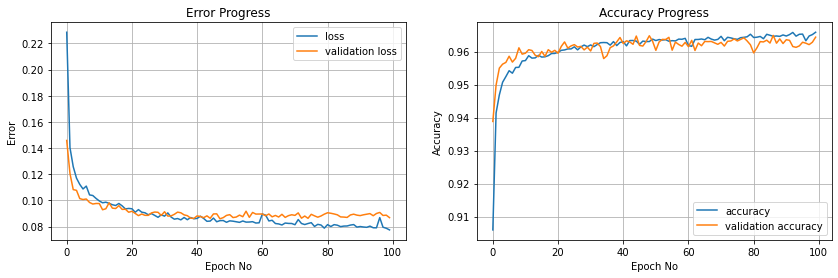

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
axes[0].plot(ann_model_history.history['loss'], label='loss')
axes[0].plot(ann_model_history.history['val_loss'], label='validation loss')

axes[1].plot(ann_model_history.history['accuracy'], label='accuracy')
axes[1].plot(ann_model_history.history['val_accuracy'], label='validation accuracy')

axes[0].set_xlabel('Epoch No')
axes[0].set_ylabel('Error')
axes[0].set_title('Error Progress')
axes[0].legend()
axes[0].grid(True)

axes[1].set_xlabel('Epoch No')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Progress')
axes[1].legend()
axes[1].grid(True)

From the above graph we can see that there's a steady decrease in loss, with a final validation loss at 0.0885, giving the model a good 96.19% accuracy.

In [32]:
accuracy_ann = ann_model.evaluate(test_features, test_labels, verbose=0)[1]

In [33]:
prediction_ann = list(ann_model.predict(test_features).flatten())

# DNN Model with more layers
Applying BatchNormalization to maintain the mean output close to 0, whereas the output of the standard deviation is close to 1 (1NF)

In [34]:
ann_model_bn = keras.Sequential(
    [keras.layers.Dense(32, activation='relu', input_shape=(train_features.shape[-1],)),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.1),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(512, activation='relu'),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(1, activation='sigmoid'),
    ]
)

ann_model_bn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [35]:
ann_model_bn.compile(
    optimizer=keras.optimizers.Adam(lr=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [36]:
ann_model_bn_history = ann_model_bn.fit(
    train_features,
    train_labels,
    batch_size=1024,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 4s 31ms/step - loss: 0.3594 - accuracy: 0.8496 - val_loss: 0.2440 - val_accuracy: 0.8835
Epoch 2/100
82/82 [==============================] - 2s 28ms/step - loss: 0.1669 - accuracy: 0.9305 - val_loss: 0.1457 - val_accuracy: 0.9360
Epoch 3/100
82/82 [==============================] - 2s 28ms/step - loss: 0.1501 - accuracy: 0.9376 - val_loss: 0.1277 - val_accuracy: 0.9462
Epoch 4/100
82/82 [==============================] - 2s 28ms/step - loss: 0.1363 - accuracy: 0.9423 - val_loss: 0.1314 - val_accuracy: 0.9430
Epoch 5/100
82/82 [==============================] - 2s 28ms/step - loss: 0.1360 - accuracy: 0.9419 - val_loss: 0.1113 - val_accuracy: 0.9542
Epoch 6/100
82/82 [==============================] - 2s 28ms/step - loss: 0.1242 - accuracy: 0.9489 - val_loss: 0.1068 - val_accuracy: 0.9547
Epoch 7/100
82/82 [==============================] - 2s 28ms/step - loss: 0.1219 - accuracy: 0.9488 - val_loss: 0.1057 - val_accuracy: 0.9570
Epoch 

82/82 [==============================] - 2s 30ms/step - loss: 0.0937 - accuracy: 0.9608 - val_loss: 0.0874 - val_accuracy: 0.9631
Epoch 59/100
82/82 [==============================] - 2s 29ms/step - loss: 0.0972 - accuracy: 0.9593 - val_loss: 0.0875 - val_accuracy: 0.9635
Epoch 60/100
82/82 [==============================] - 2s 30ms/step - loss: 0.0949 - accuracy: 0.9597 - val_loss: 0.0857 - val_accuracy: 0.9638
Epoch 61/100
82/82 [==============================] - 2s 29ms/step - loss: 0.0963 - accuracy: 0.9595 - val_loss: 0.0860 - val_accuracy: 0.9641
Epoch 62/100
82/82 [==============================] - 2s 29ms/step - loss: 0.0947 - accuracy: 0.9599 - val_loss: 0.0864 - val_accuracy: 0.9645
Epoch 63/100
82/82 [==============================] - 2s 29ms/step - loss: 0.0974 - accuracy: 0.9588 - val_loss: 0.0837 - val_accuracy: 0.9643
Epoch 64/100
82/82 [==============================] - 3s 33ms/step - loss: 0.0936 - accuracy: 0.9594 - val_loss: 0.0857 - val_accuracy: 0.9640
Epoch 65/100

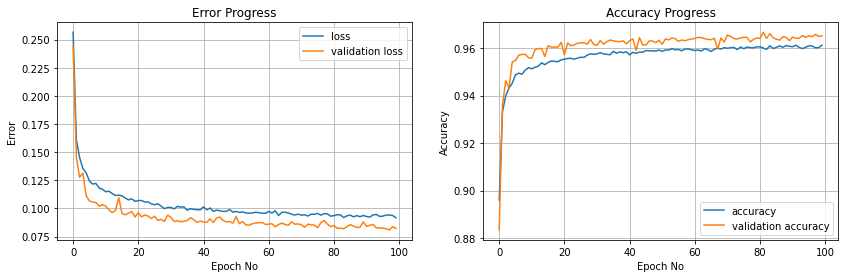

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
axes[0].plot(ann_model_bn_history.history['loss'], label='loss')
axes[0].plot(ann_model_bn_history.history['val_loss'], label='validation loss')

axes[1].plot(ann_model_bn_history.history['accuracy'], label='accuracy')
axes[1].plot(ann_model_bn_history.history['val_accuracy'], label='validation accuracy')

axes[0].set_xlabel('Epoch No')
axes[0].set_ylabel('Error')
axes[0].set_title('Error Progress')
axes[0].legend()
axes[0].grid(True)

axes[1].set_xlabel('Epoch No')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Progress')
axes[1].legend()
axes[1].grid(True)

From the above graph we can see that there's a steady decrease in loss, with a final validation loss at 0.0826, giving the model a good 96.44% accuracy, which is marginally better than our previous network model.

In [38]:
accuracy_annbn = ann_model_bn.evaluate(test_features, test_labels, verbose=0)[1]

In [39]:
prediction_annbn = list(ann_model_bn.predict(test_features).flatten())

# Model Comparison

In [40]:
accuracyscores = [accuracy_rf, accuracy_xgb, accuracy_ann, accuracy_annbn]
model_scores = pd.DataFrame(accuracyscores, index=['Random Forest', 'XGBoost', 'ANN', 'ANN with BN'], columns=['Accuracy'])
model_scores

,Accuracy
Random Forest,0.963120
XGBoost,0.962812
ANN,0.963620
ANN with BN,0.962812


In [41]:
model_predictions = pd.DataFrame(list(zip(test_labels, prediction_rf, prediction_xgb,
                                          map(round, prediction_ann), map(round, prediction_annbn))), 
                                 columns=['Actual Labels', 'Random Forest', 'XGBoost', 'ANN', 'ANN with BN'])

model_predictions

,Actual Labels,Random Forest,XGBoost,ANN,ANN with BN
0,1,1,1,1,1
1,1,1,1,1,1
2,0,0,0,0,0
3,1,1,1,1,1
4,1,0,0,1,0
...,...,...,...,...,...
25971,0,0,0,0,0
25972,1,1,1,1,1
25973,0,0,0,0,0
25974,1,1,1,1,1


In [42]:
prediction_results = list(map(lambda x: round(100-x*100, 2), model_scores['Accuracy']))
labels = ['Random Forest', 'XGBoost', 'ANN', 'ANN with BN']

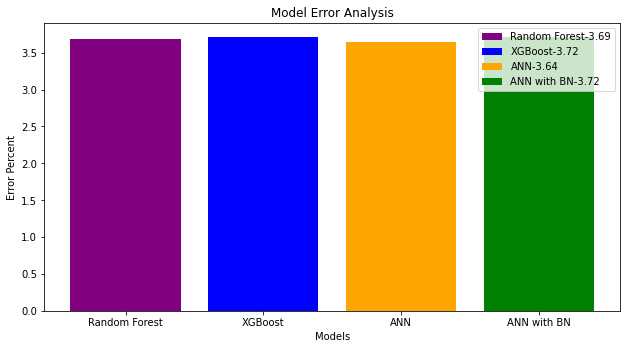

In [43]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
colors=['grey', 'purple', 'blue', 'yellow', 'green']
ax.bar(labels[0], prediction_results[0], color='purple', label=labels[0]+'-'+str(prediction_results[0]))
ax.bar(labels[1], prediction_results[1], color='blue', label=labels[1]+'-'+str(prediction_results[1]))
ax.bar(labels[2], prediction_results[2], color='orange', label=labels[2]+'-'+str(prediction_results[2]))
ax.bar(labels[3], prediction_results[3], color='green', label=labels[3]+'-'+str(prediction_results[3]))
ax.set_xlabel('Models')
ax.set_ylabel('Error Percent')
ax.set_xticklabels(labels)
ax.set_title('Model Error Analysis')
ax.legend()

In [44]:
ann_model_bn.save('dnn_model')
ann_model.save('lr_model')
import pickle
pickle.dump(model_xgb,open("model_xgb.pkl",'wb'))
pickle.dump(model_rf,open("model_rf.pkl",'wb'))

INFO:tensorflow:Assets written to: dnn_model\assets
INFO:tensorflow:Assets written to: lr_model\assets
